In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [3]:

dev_data_path = r'/home/harsh/Hackathons/convolve/data/dev/Dev_data_to_be_shared.csv'

try:
    df = pd.read_csv(dev_data_path)
    print(f"Development data loaded successfully with shape: {df.shape}")
except FileNotFoundError:
    print(f"File not found at {dev_data_path}. Please check the path and try again.")


Development data loaded successfully with shape: (96806, 1216)


In [4]:
df.head()

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,221000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,86000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,215000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96806 entries, 0 to 96805
Columns: 1216 entries, account_number to onus_attribute_48
dtypes: float64(1189), int64(27)
memory usage: 898.1 MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account_number,96806.0,48403.500000,27945.629417,1.0,24202.25,48403.5,72604.75,96806.000
bad_flag,96806.0,0.014173,0.118203,0.0,0.00,0.0,0.00,1.000
onus_attribute_1,71575.0,154239.119804,172992.463938,25000.0,59000.00,100000.0,181000.00,2800000.000
transaction_attribute_1,71575.0,9.570769,1513.967595,0.0,0.00,0.0,0.00,398936.791
transaction_attribute_2,71575.0,0.002207,0.119240,0.0,0.00,0.0,0.00,25.000
...,...,...,...,...,...,...,...,...
onus_attribute_44,11610.0,1.497158,1.702795,0.0,1.00,1.0,2.00,38.000
onus_attribute_45,11610.0,0.545650,1.055865,0.0,0.00,0.0,1.00,19.000
onus_attribute_46,11610.0,1.430491,1.728950,0.0,1.00,1.0,2.00,38.000
onus_attribute_47,11610.0,0.121447,0.601256,0.0,0.00,0.0,0.00,15.000


In [7]:
bad_flag_counts = df['bad_flag'].value_counts()
print(f"Bad Flag Distribution:\n{bad_flag_counts}")

Bad Flag Distribution:
bad_flag
0    95434
1     1372
Name: count, dtype: int64


/tmp/ipykernel_52034/1623439321.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bad_flag', data=df, palette='viridis')


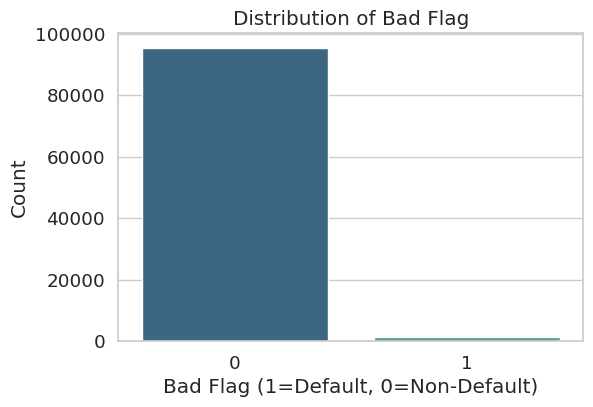

: 

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='bad_flag', data=df, palette='viridis')
plt.title('Distribution of Bad Flag')
plt.xlabel('Bad Flag (1=Default, 0=Non-Default)')
plt.ylabel('Count')
plt.show()

In [ ]:

missing_values = df.isnull().mean().sort_values(ascending=False) * 100
missing_values = missing_values[missing_values > 0]

print(f"Columns with Missing Values:\n{missing_values}")

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


Columns with Missing Values:
bureau_447           100.000000
bureau_436           100.000000
bureau_449            94.124331
bureau_148            93.552053
bureau_448            90.028511
                        ...    
bureau_230             1.232362
onus_attribute_13      0.002066
onus_attribute_10      0.002066
onus_attribute_5       0.002066
onus_attribute_16      0.002066
Length: 1185, dtype: float64


In [ ]:
# List of numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('bad_flag')  # Exclude target variable

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Numerical Columns ({len(numerical_cols)}):\n{numerical_cols}")
print(f"\nCategorical Columns ({len(categorical_cols)}):\n{categorical_cols}")


In [ ]:
# Histograms for numerical features
df[numerical_cols].hist(bins=30, figsize=(20, 15), color='steelblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()


In [ ]:
# Boxplots for numerical features to detect outliers
plt.figure(figsize=(20, 15))
for idx, col in enumerate(numerical_cols):
    plt.subplot(5, 4, idx+1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [ ]:

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(y=col, data=df, palette='viridis', order=df[col].value_counts().index)
    plt.title(f'Count of Categories in {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()


In [ ]:

selected_features = numerical_cols[:5]

sns.pairplot(df, vars=selected_features, hue='bad_flag', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features Colored by Bad Flag', y=1.02)
plt.show()


In [ ]:

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, hue='bad_flag', data=df, palette='viridis')
    plt.title(f'{col} vs. Bad Flag')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Bad Flag', labels=['Non-Default', 'Default'])
    plt.show()


In [ ]:

corr_matrix = df[numerical_cols + ['bad_flag']].corr()

plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
